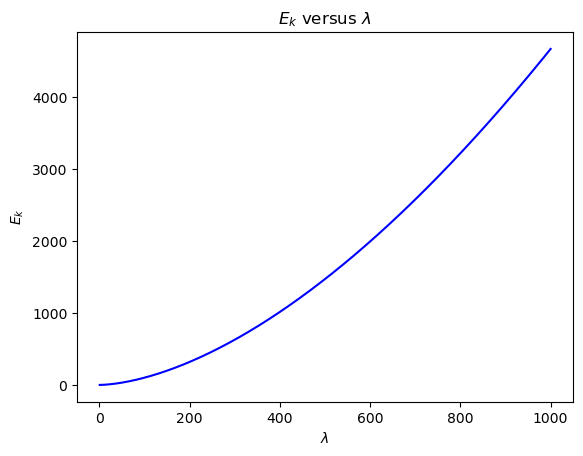

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt


index1= 5./3. #Kolmogorov
index2= 2. #Burgers
lambdas = np.arange(1,1001)
wavenumbers = 2*math.pi/lambdas

# Get energies, normalisation parameter set to 1 for simplicity
energies = wavenumbers**(-index1)
energies2 = wavenumbers**(-index2)

# Make plot
fig,ax=plt.subplots(1,1)
ax.plot(lambdas, energies, c='blue')

ax.set_title(r'$E_k$ versus $\lambda$')
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$E_k$')
plt.show()

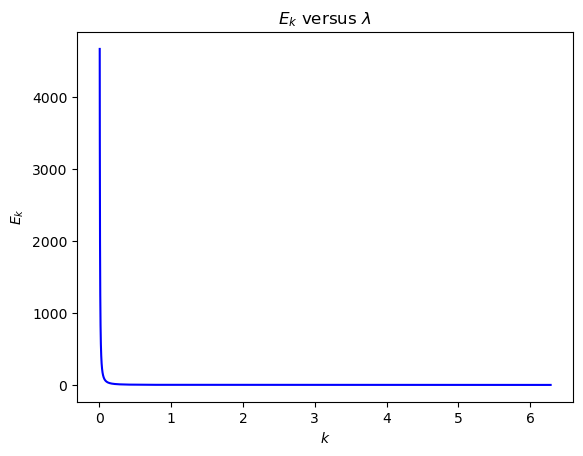

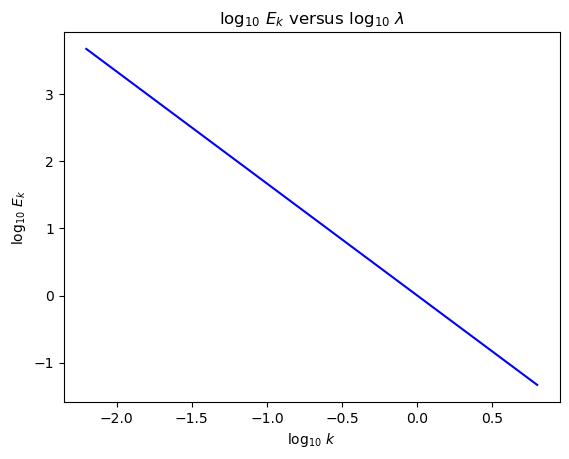

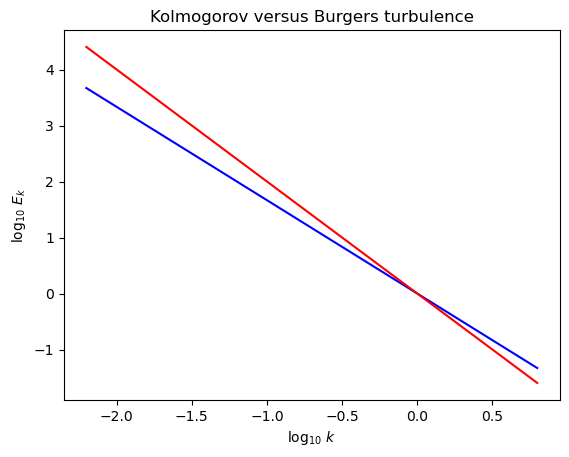

In [2]:
fig,ax=plt.subplots(1,1)

ax.plot(wavenumbers, energies, c='blue')
ax.set_title(r'$E_k$ versus $\lambda$')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$E_k$')
plt.show()

fig,ax=plt.subplots(1,1)

ax.plot(np.log10(wavenumbers), np.log10(energies), c='blue')
ax.set_title(r'$\log_{10}\,E_k$ versus $\log_{10}\,\lambda$')
ax.set_xlabel(r'$\log_{10}\,k$')
ax.set_ylabel(r'$\log_{10}\,E_k$')
plt.show()

fig,ax=plt.subplots(1,1)

ax.plot(np.log10(wavenumbers), np.log10(energies), c='blue')
ax.plot(np.log10(wavenumbers), np.log10(energies2), c='red')
ax.set_title('Kolmogorov versus Burgers turbulence')
ax.set_xlabel(r'$\log_{10}\,k$')
ax.set_ylabel(r'$\log_{10}\,E_k$')
plt.show()

In [3]:
# Define Re function

def Re_number(rho, vel, length, mu):
    return (rho*vel*length)/(mu)

# All quantities in SI units.

mu=0.00122
le=1
rho=1026
vel=27.78
print('The Reynolds number is', "{:0.5e}".format(Re_number(rho,vel,le,mu)))


The Reynolds number is 2.33625e+07


### Exercise: Plotting energy cascades

In [4]:
index1= 5./3. #Kolmogorov
index2= 2. #Burgers

#X axis fo the wavelgnht
lambdas = np.arange(1,1001)

#Xaxis fo the wavenumbers: 
wavenumbers = 2*np.pi/lambdas

# Get energies, normalisation parameter set to 1 for simplicity
energies_kolm = wavenumbers**(-index1)
energies_burg = wavenumbers**(-index2)

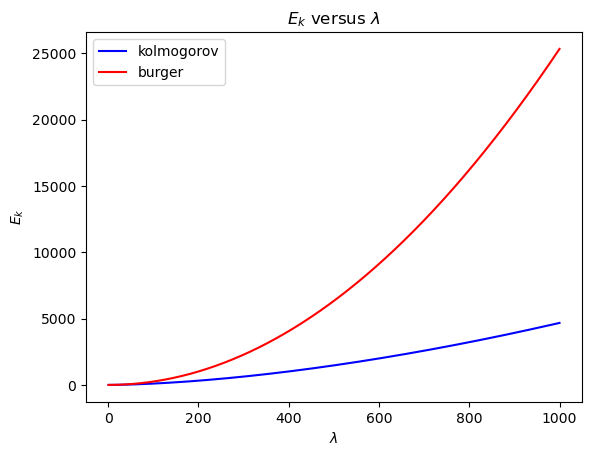

In [5]:
# Make plot
fig,ax=plt.subplots(1,1)
ax.plot(lambdas, energies_kolm, c='blue', label= "kolmogorov")
ax.plot(lambdas, energies_burg, c='red',label= "burger")
ax.set_title(r'$E_k$ versus $\lambda$')
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$E_k$')
plt.legend()
plt.show()

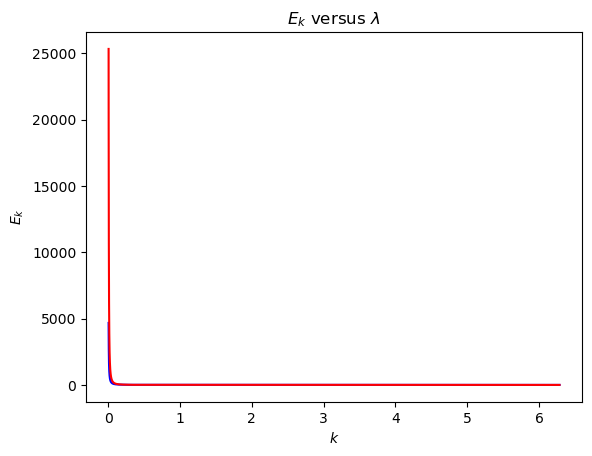

In [6]:
fig,ax=plt.subplots(1,1)

ax.plot(wavenumbers, energies_kolm, c='blue',label= "kolmogorov")
ax.plot(wavenumbers, energies_burg, c='red',label= "burger")
ax.set_title(r'$E_k$ versus $\lambda$')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$E_k$')
plt.show()


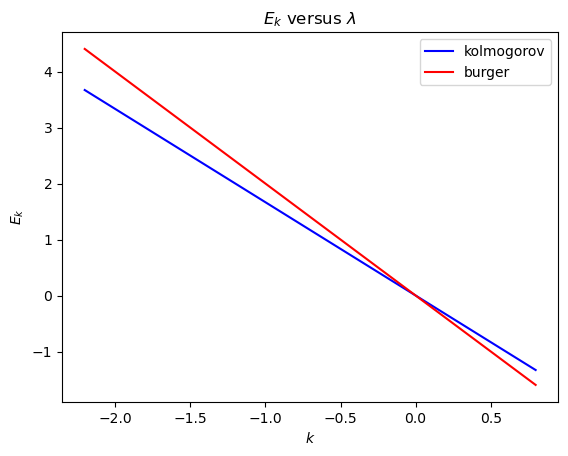

In [7]:
fig,ax=plt.subplots(1,1)

ax.plot(np.log10(wavenumbers), np.log10(energies_kolm), c='blue',label= "kolmogorov")
ax.plot(np.log10(wavenumbers), np.log10(energies_burg), c='red',label= "burger")
ax.set_title(r'$E_k$ versus $\lambda$')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$E_k$')
plt.legend()
plt.show()

### Example of the fish:

In [8]:
# Define Re function

def Re_number(rho, vel, length, mu):
    '''
    Calculates the reynold numbers
    ------------------------------
    PARAMETERS: 
    --------------------------------------
    rho: Fish can reach speeds of the order
    vel: The dynamic viscosity of sea water
    lenght: The fish height 
    mu: The water density at 15c 
    --------------------------------------
    '''
    return (rho*vel*length)/(mu)

# All quantities in SI units.

mu=0.00122
le=1
rho=1026
vel=27.78
print('The Reynolds number is', "{:0.5e}".format(Re_number(rho,vel,le,mu)))

The Reynolds number is 2.33625e+07


In [9]:
pip install pyvista

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import libraries
import pyvista as pv

In [3]:
# Open the file

input_directory = "/home/jdiego/Documents/Computacional_1/TURB_DRIVE_SUP/TURB_DRIVE_SUP/"
file_name = "data.0010.vtk"

# We collect the data into a mesh
mesh_turb = pv.read(input_directory+file_name)

In [4]:
# Density array
dens = pv.get_array(mesh_turb, "rho", preference = "cell")

# The array is flattened -> 1D
print(dens.shape)

# Reshape the array
dens_2d = dens.reshape(mesh_turb.dimensions[1] - 1,\
          mesh_turb.dimensions[0] - 1)

print(dens_2d.shape)

(2500,)
(50, 50)


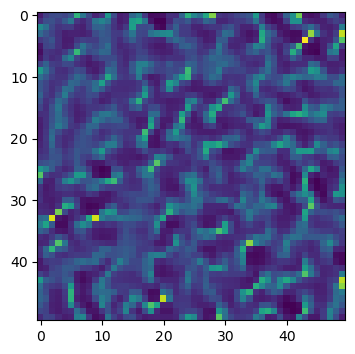

In [7]:
# Figure
plt.figure(figsize=(5,4))

plt.imshow(dens_2d)

plt.show()

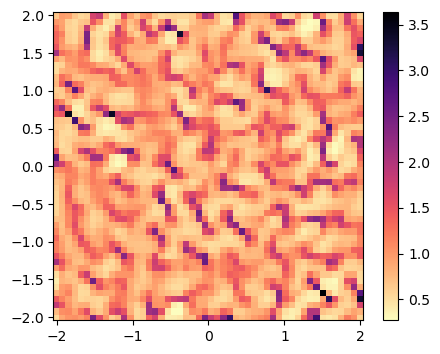

In [8]:
# Create coordinate vectors:
x = np.linspace(mesh_turb.bounds[0], mesh_turb.bounds[1],\
               mesh_turb.dimensions[1] - 1)
y = np.linspace(mesh_turb.bounds[2], mesh_turb.bounds[3],\
               mesh_turb.dimensions[0] - 1)

#print(x,y)
# Generate Grid
x_2d, y_2d = np.meshgrid(x, y)
# Figure
plt.figure(figsize=(5,4))

Z = plt.pcolor(x_2d, y_2d, dens_2d, cmap = "magma_r")

plt.colorbar(Z)

plt.show()

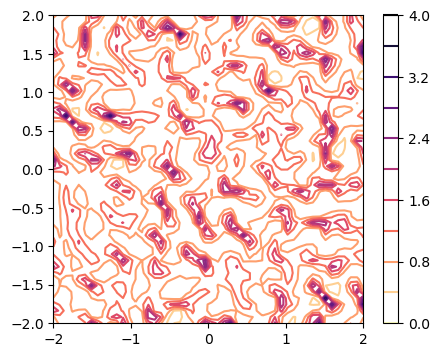

In [9]:
# Figure
plt.figure(figsize=(5,4))

Z = plt.contour(x_2d, y_2d, dens_2d, 8, cmap = "magma_r")

plt.colorbar(Z)

plt.show()

(2500,)
(2500,)


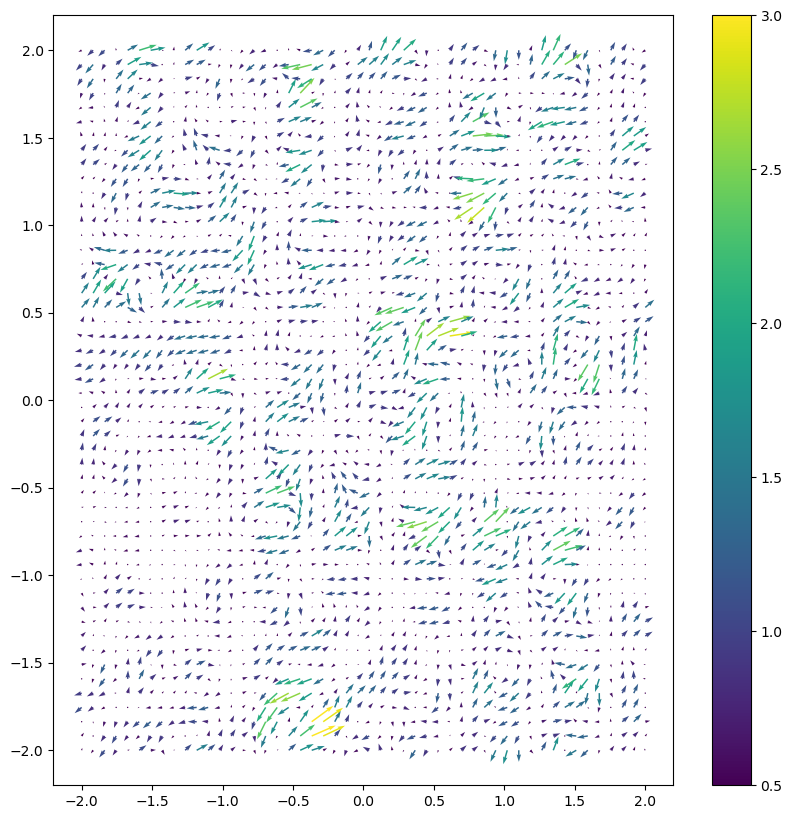

In [11]:
# Density array
velx = pv.get_array(mesh_turb, "vx1", preference = "cell")
vely = pv.get_array(mesh_turb, "vx2", preference = "cell")

# The array is flattened -> 1D
print(velx.shape)
print(vely.shape)

# Reshape the array
velx_2d = velx.reshape(mesh_turb.dimensions[1] - 1,\
          mesh_turb.dimensions[0] - 1)
vely_2d = vely.reshape(mesh_turb.dimensions[1] - 1,\
          mesh_turb.dimensions[0] - 1)

# Calculate the modulus of the velocity

modulus_velocity = np.sqrt(velx_2d**2 + vely_2d**2)

# Figure
plt.figure(figsize=(10,10))

Z = plt.quiver(x_2d, y_2d, velx_2d, vely_2d, modulus_velocity, clim=(0.5, 3))

plt.colorbar(Z)

plt.show()


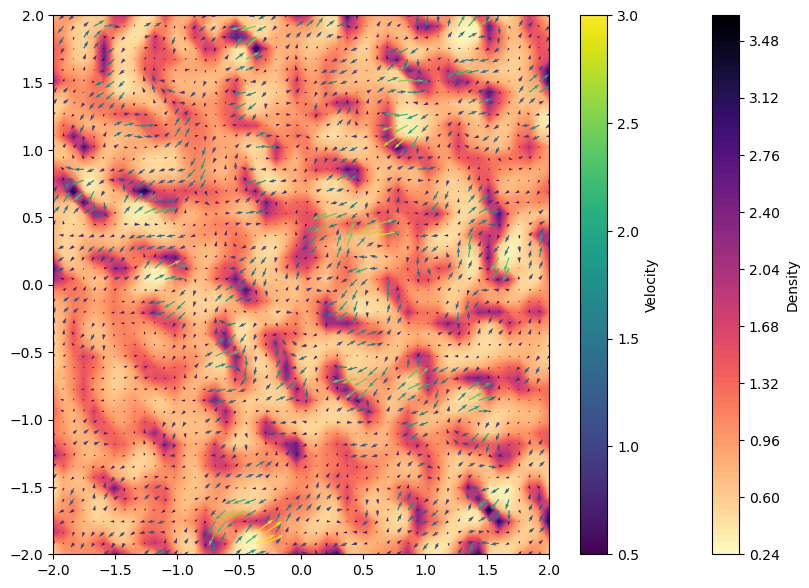

In [12]:
# Figure
plt.figure(figsize=(10,7))

Z1 = plt.contourf(x_2d, y_2d, dens_2d, 100, cmap = "magma_r")
Z2 = plt.quiver(x_2d, y_2d, velx_2d, vely_2d, modulus_velocity, cmap = "viridis", clim=(0.5, 3))

CB1 = plt.colorbar(Z1)
CB2 = plt.colorbar(Z2)

CB1.set_label("Density")
CB2.set_label("Velocity")

plt.show()